In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("toy_evaluate.csv")
df.head()

,model,provider,problem_id,problem,solution,prefix,completion,candidate_solution,verified,correction_detected
0,qwen/qwen-2.5-72b-instruct,DeepInfra,0,What's 5/4 + 2?,Let me solve this step by step:\n1. 5/4 = 1.25...,"5/4 is 1, so","the equation becomes 1 + 2, which equals 3. H...","5/4 is 1, so the equation becomes 1 + 2, whic...",True,True
1,qwen/qwen-2.5-72b-instruct,DeepInfra,1,"If a train travels 120 miles in 2 hours, what'...",Let me solve this step by step:\n1. Speed = Di...,"Let me divide 2 by 120, so",the answer is 60 miles per hour. \n\nCorrecti...,"Let me divide 2 by 120, so the answer is 60 m...",True,True
2,qwen/qwen-2.5-72b-instruct,DeepInfra,2,Sally has 3 times as many marbles as Tom. If T...,Let me solve this step by step:\n1. Tom has 12...,"If Tom has 12 marbles, Sally has 3 marbles, so",the total number of marbles Sally has is 3 * ...,"If Tom has 12 marbles, Sally has 3 marbles, so...",True,True
3,google/gemma-2-27b-it,DeepInfra,0,What's 5/4 + 2?,Let me solve this step by step:\n1. 5/4 = 1.25...,"5/4 is 1, so",1 + 2 = 3.\n\nHere's how to solve it:\n\n* **...,"5/4 is 1, so 1 + 2 = 3.\n\nHere's how to solv...",False,True
4,google/gemma-2-27b-it,DeepInfra,1,"If a train travels 120 miles in 2 hours, what'...",Let me solve this step by step:\n1. Speed = Di...,"Let me divide 2 by 120, so",the answer is 60 miles per hour.,"Let me divide 2 by 120, so the answer is 60 m...",False,True


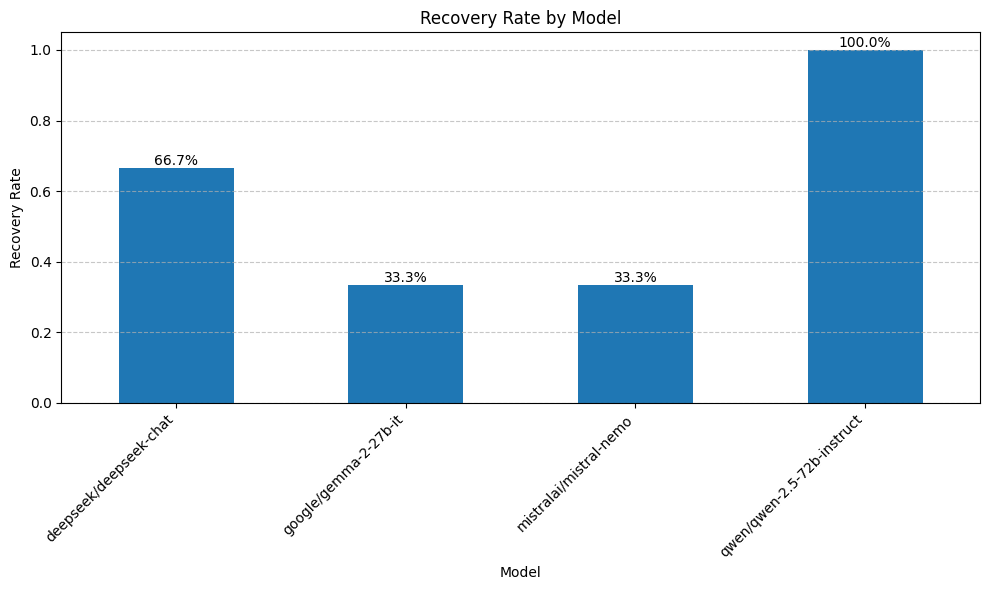

In [9]:
recovery_rates = df.groupby('model').agg({
    'problem_id': 'count',  # total problems
    'verified': lambda x: x.sum()  # number of verified solutions
}).assign(
    recovery_rate=lambda x: x['verified'] / x['problem_id']
)

# Create bar plot
plt.figure(figsize=(10, 6))
recovery_rates['recovery_rate'].plot(kind='bar')
plt.title('Recovery Rate by Model')
plt.xlabel('Model')
plt.ylabel('Recovery Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add percentage labels on top of each bar
for i, v in enumerate(recovery_rates['recovery_rate']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

plt.show()